In [1]:
import pandas as pd
import glob
import random
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
"""
数据准备
"""
folder_path = 'data_with_momentum'
file_list = glob.glob(f'{folder_path}/2023-wimbledon-*.csv')
dataframes = [pd.read_csv(file) for file in file_list]

In [3]:
"""
特征工程：创建新的特征列
"""
# 数据拆分
def dataset_split(dataframes, ratio=0.2):
    total_dataframes = len(dataframes)
    num_test = int(total_dataframes * ratio)
    num_train = total_dataframes - num_test

    random.shuffle(dataframes)
    train_dfs = dataframes[:num_train]
    test_dfs = dataframes[num_train:]

    combined_train_df = pd.concat(train_dfs, ignore_index=True)
    combined_test_df = pd.concat(test_dfs, ignore_index=True)

    return combined_train_df, combined_test_df


combined_train_df, combined_test_df = dataset_split(dataframes, ratio=0.2)

# 从合并后的DataFrame中提取特征和目标变量
feature_columns = ['p1_sets', 'p2_sets', 'p1_games', 'p2_games', 'server', 'p1_ace', 'p2_ace', 'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err', 'p1_break_pt_won', 'p2_break_pt_won', 'p1_break_pt_missed', 'p2_break_pt_missed', 'p1_distance_run', 'p2_distance_run', 'rally_count', 'speed_mph']
# feature_columns = dataframes[0].columns.tolist()[:-2]

# 填充缺失值
for column in feature_columns:
    mean_value = combined_train_df[column].mean()
    combined_train_df[column] = combined_train_df[column].fillna(mean_value)
    combined_test_df[column] = combined_test_df[column].fillna(mean_value)

X_train = combined_train_df[feature_columns]
X_test = combined_test_df[feature_columns]
y_train = combined_train_df[['comprehensive_momentum_1', 'comprehensive_momentum_2']]
y_test = combined_test_df[['comprehensive_momentum_1', 'comprehensive_momentum_2']]

# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
"""
选择模型
"""
model = RandomForestRegressor()

# 训练模型
model.fit(X_train, y_train)

# 测试集预测
y_pred = model.predict(X_test)

# 使用 R² score 作为评估指标
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

R² score: 0.0803539458821595


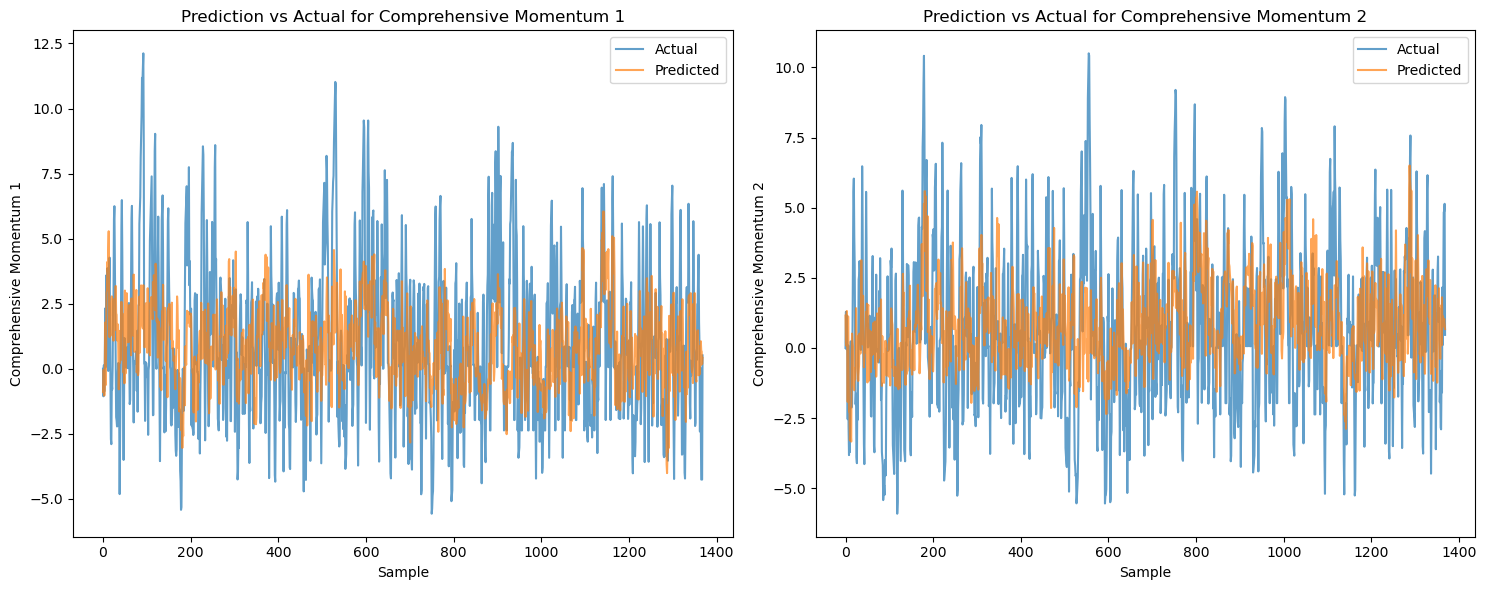

In [5]:
"""
可视化预测数据与实际数据的曲线
"""
plt.figure(figsize=(15, 6))

# 对于 comprehensive_momentum_1
plt.subplot(1, 2, 1)  # 1行2列的图表中的第一个
plt.plot(y_test['comprehensive_momentum_1'].values, label='Actual', alpha=0.7)
plt.plot(y_pred[:, 0], label='Predicted', alpha=0.7)
plt.title('Prediction vs Actual for Comprehensive Momentum 1')
plt.xlabel('Sample')
plt.ylabel('Comprehensive Momentum 1')
plt.legend()

# 对于 comprehensive_momentum_2
plt.subplot(1, 2, 2)  # 1行2列的图表中的第二个
plt.plot(y_test['comprehensive_momentum_2'].values, label='Actual', alpha=0.7)
plt.plot(y_pred[:, 1], label='Predicted', alpha=0.7)
plt.title('Prediction vs Actual for Comprehensive Momentum 2')
plt.xlabel('Sample')
plt.ylabel('Comprehensive Momentum 2')
plt.legend()

plt.tight_layout()
plt.show()

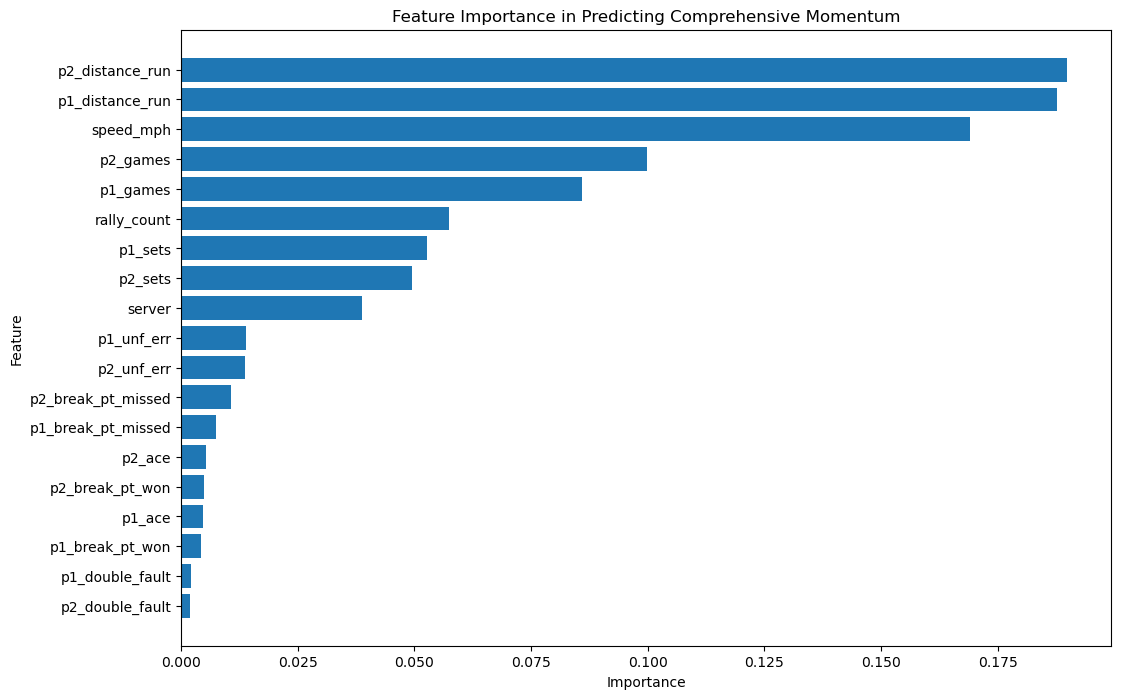

In [6]:
"""
特征重要性
"""
feature_importances = model.feature_importances_

# 将特征和其重要性组合为DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})

# 排序特征重要性
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Comprehensive Momentum')
plt.gca().invert_yaxis()
plt.show()

In [7]:
new_feature = feature_importance_df[:9]
new_feature

,Feature,Importance
16,p2_distance_run,0.189812
15,p1_distance_run,0.187784
18,speed_mph,0.169048
3,p2_games,0.099901
2,p1_games,0.085994
17,rally_count,0.057361
0,p1_sets,0.052736
1,p2_sets,0.049474
4,server,0.038731


R² score: 0.07458569253464392


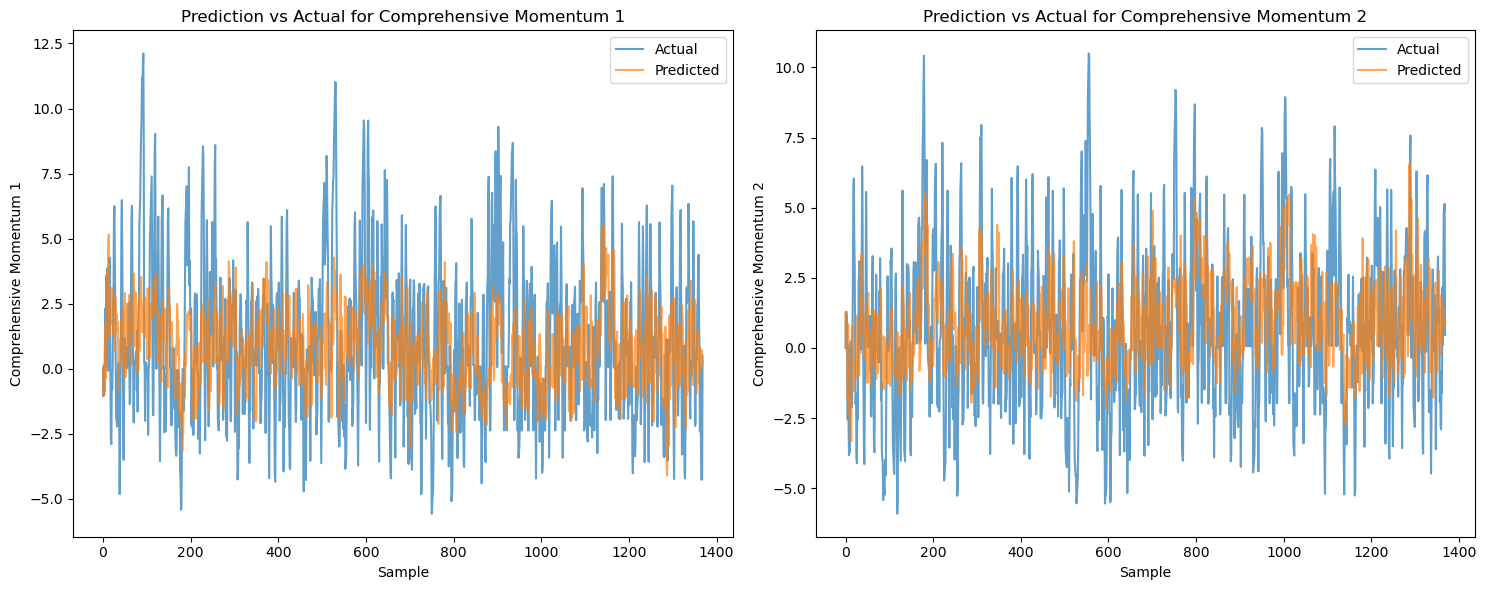

In [8]:
# 新特征
X_train_new = combined_train_df[new_feature]
X_test_new = combined_test_df[new_feature]
y_train_new = combined_train_df[['comprehensive_momentum_1', 'comprehensive_momentum_2']]
y_test_new = combined_test_df[['comprehensive_momentum_1', 'comprehensive_momentum_2']]

# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestRegressor()

# 训练模型
model.fit(X_train, y_train)

# 测试集预测
y_pred = model.predict(X_test)

# 使用 R² score 作为评估指标
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

plt.figure(figsize=(15, 6))

# 对于 comprehensive_momentum_1
plt.subplot(1, 2, 1)  # 1行2列的图表中的第一个
plt.plot(y_test['comprehensive_momentum_1'].values, label='Actual', alpha=0.7)
plt.plot(y_pred[:, 0], label='Predicted', alpha=0.7)
plt.title('Prediction vs Actual for Comprehensive Momentum 1')
plt.xlabel('Sample')
plt.ylabel('Comprehensive Momentum 1')
plt.legend()

# 对于 comprehensive_momentum_2
plt.subplot(1, 2, 2)  # 1行2列的图表中的第二个
plt.plot(y_test['comprehensive_momentum_2'].values, label='Actual', alpha=0.7)
plt.plot(y_pred[:, 1], label='Predicted', alpha=0.7)
plt.title('Prediction vs Actual for Comprehensive Momentum 2')
plt.xlabel('Sample')
plt.ylabel('Comprehensive Momentum 2')
plt.legend()

plt.tight_layout()
plt.show()